In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Load data

In [3]:
from scipy.stats import triang
distr = triang(loc=-1, scale=2, c=0.5)
N = int(1e5)
samples = distr.rvs(size=N)
lower_bound, upper_bound = -1, 1

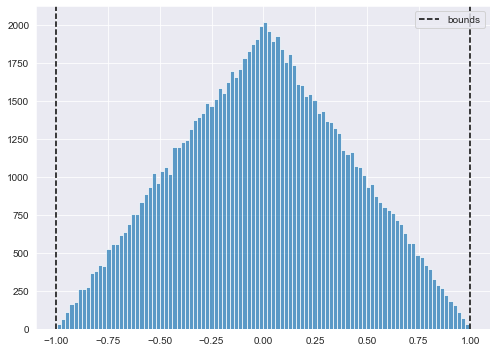

In [4]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)
    
    ax.hist(samples, bins=100, alpha=0.7)
    ax.axvline(x=lower_bound, color='black', linestyle='--')
    ax.axvline(x=upper_bound, color='black', linestyle='--', label='bounds')
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

## Concentration bounds

In [5]:
from concentration_lib import laplace_hoeffding_uniform_bound, hoeffding_peeling_uniform_bound, hoeffding_union_uniform_bound, bentkus_peeling_uniform_bound
from scipy.special import zeta

n = 1000
M = 100
delta = 0.05

S = np.cumsum(samples.reshape((n, M)), axis=0)

/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sauxpa/github/concentration/concentration_lib/concentration_bounds.py:190: RuntimeWarning: divide by zero encountered in true_divide
  psi = (v - kk * e) / (e - kk * p)
/home/sauxpa/github/concentration/concentration_lib/concentration_bounds.py:190: RuntimeWarning: invalid value encountered in true_divide
  psi = (v - kk * e) / (e - kk * p)
/home/sauxpa/github/concentration/concentration_lib/concentration_bounds.py:201: RuntimeWarning: invalid value encountered in double_scalars
  return (v[k]*p[k]-e[k]**2)/(x**2*p[k]-2*x*e[k]+v[k])


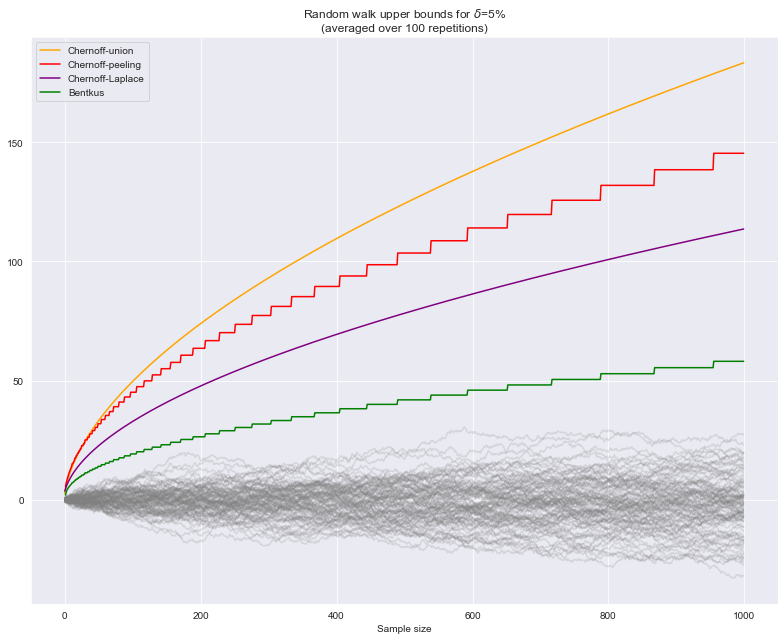

In [6]:
nn = np.linspace(1, n, n)
delta = 0.05
eta = 1.1
exponent = 1.1
normalisation = zeta(exponent)
h = lambda k: normalisation * k ** exponent

with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(11, 9), nrows=1, ncols=1)

    ax.plot(S, color='grey', alpha=0.2)
    ax.plot(hoeffding_union_uniform_bound(delta, nn, upper_bound, mode='sum'), color='orange', label='Chernoff-union')
    ax.plot(hoeffding_peeling_uniform_bound(delta, nn, upper_bound, h, eta, mode='sum'), color='red', label='Chernoff-peeling')
    ax.plot(laplace_hoeffding_uniform_bound(delta, nn, upper_bound, mode='sum'), color='purple', label='Chernoff-Laplace')
    ax.plot(bentkus_peeling_uniform_bound(delta, nn, distr.std(), upper_bound, h, eta, mode='sum'), color='green', label='Bentkus')
    
    ax.set_xlabel('Sample size')
    ax.legend(loc='upper left')
    ax.set_title('Random walk upper bounds for $\delta$={:.0%}\n(averaged over {:.0f} repetitions)'.format(delta, M))
   
    plt.tight_layout()
    plt.show()